In [1]:
# import of libraries and packages
import numpy as np
import copy
import matplotlib.pyplot as plt
from planar_testcases_utils import *
import sklearn
import sklearn.datasets
from sklearn.linear_model import LogisticRegressionCV
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

In [2]:
X, Y = load_planar_dataset()

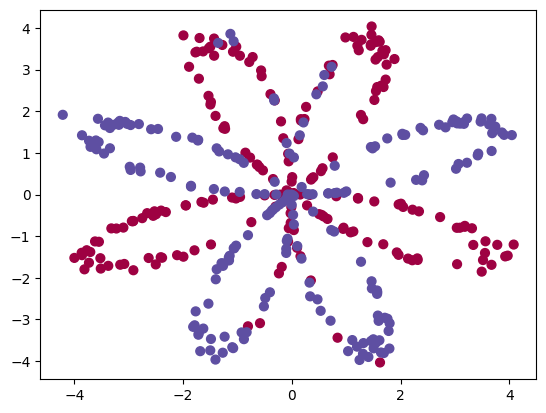

In [3]:
# visualize the data
plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
# train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

/tmp/ipykernel_18/1855509755.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+'%' + "(percentage of the correctly labelled datapoints) \n")


Accuracy of logistic regression: 47 %(percentage of the correctly labelled datapoints) 



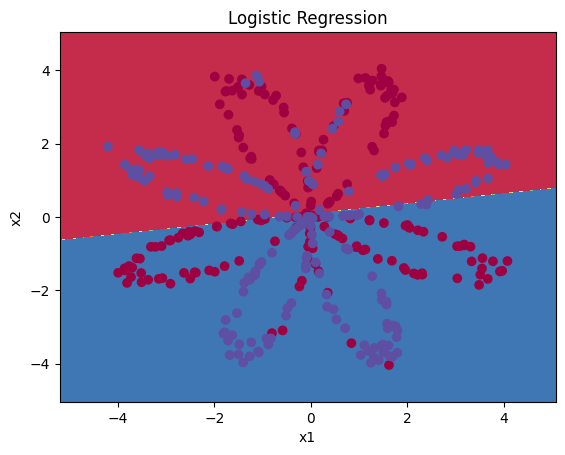

In [5]:
# plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# print the accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+'%' + "(percentage of the correctly labelled datapoints) \n")

In [6]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of exmples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [7]:
X_assess, Y_assess =layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)

print("The size of input layer is: n_x = " + str(n_x))
print("The size of input layer is: n_h = " + str(n_h))
print("The size of input layer is: n_y = " + str(n_y))

The size of input layer is: n_x = 5
The size of input layer is: n_h = 4
The size of input layer is: n_y = 2


In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # to ensure output consistency, although the initialization is random
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2":b2}
    
    return parameters

In [9]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 =" + str(parameters["W2"]))
print("b2 =" + str(parameters["b2"]))

W1 =[[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 =[[0.]
 [0.]
 [0.]
 [0.]]
W2 =[[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 =[[0.]]


In [10]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- Sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2", "A2"
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1, 
             "A1": A1, 
             "Z2": Z2, 
             "A2": A2}
    
    return A2, cache

In [11]:
X_assess, parameters = forward_propagation_test_case()

A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))
print("A2 = " + str(A2))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198
A2 = [[0.21292656 0.21274673 0.21295976]]


In [12]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- cross-entropy cosy given equation
    """
    
    m = Y.shape[1]
    
    logprobs = np.multiply(np.log(A2), Y)
    cost = - np.sum(logprobs)
    
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost

In [13]:
A2, t_Y = compute_cost_test_case()
cost = compute_cost(A2, t_Y)
print("cost = " + str(compute_cost(A2, t_Y)))

cost = 0.6926858869721941


In [14]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation 
    
    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    X -- input data of the shape (2, number of examples)
    Y -- "true" labels vector of shape(1, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to dfferent parameters
    """
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, 
             "db1":db1, 
             "dW2":dW2, 
             "db2":db2}
    
    return grads

In [15]:
parameters, cache, t_X, t_Y = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, t_X, t_Y)
print("dW1 =" + str(grads["dW1"]))
print("db1 =" + str(grads["db1"]))
print("dW2 =" + str(grads["dW2"]))
print("db2 =" + str(grads["db2"]))

dW1 =[[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 =[[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 =[[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 =[[-0.16655712]]


In [16]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters
    
    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients
    
    Returns:
    parameters -- pytohn dictionary containing your update parameters
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # update the rule for each parameter
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2":b2}
    
    return parameters

In [17]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 =" + str(parameters["W2"]))
print("b2 =" + str(parameters["b2"]))

W1 =[[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 =[[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 =[[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 =[[0.00010457]]


In [18]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of hidden layer
    num_iterations --Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # loop (gradient descent)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [19]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)

print("W1 =" + str(parameters["W1"]))
print("b1 =" + str(parameters["b1"]))
print("W2 =" + str(parameters["W2"]))
print("b2 =" + str(parameters["b2"]))

Cost after iteration 0: 1.386775
Cost after iteration 1000: 0.000430
Cost after iteration 2000: 0.000213
Cost after iteration 3000: 0.000141
Cost after iteration 4000: 0.000106
Cost after iteration 5000: 0.000084
Cost after iteration 6000: 0.000070
Cost after iteration 7000: 0.000060
Cost after iteration 8000: 0.000053
Cost after iteration 9000: 0.000047
W1 =[[-0.73679287 -1.36621711]
 [-0.62039407 -1.13347599]
 [-0.71454509 -1.31939197]
 [ 0.74580119  1.37837548]]
b1 =[[ 0.01230887]
 [-0.00176212]
 [ 0.00896606]
 [-0.01164917]]
W2 =[[-3.04892822 -2.13993848 -2.84526122  3.11015916]]
b2 =[[0.0041659]]


In [20]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your paramaters
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [21]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))
print("Predictions: " + str(predictions))

predictions mean = 0.6666666666666666
Predictions: [[ True False  True]]


Cost after iteration 0: 138.613963
Cost after iteration 1000: 57.643326
Cost after iteration 2000: 50.677062
Cost after iteration 3000: 46.632785
Cost after iteration 4000: 45.276968
Cost after iteration 5000: 44.448380
Cost after iteration 6000: 43.847601
Cost after iteration 7000: 43.384818
Cost after iteration 8000: 39.770529
Cost after iteration 9000: 39.493133


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

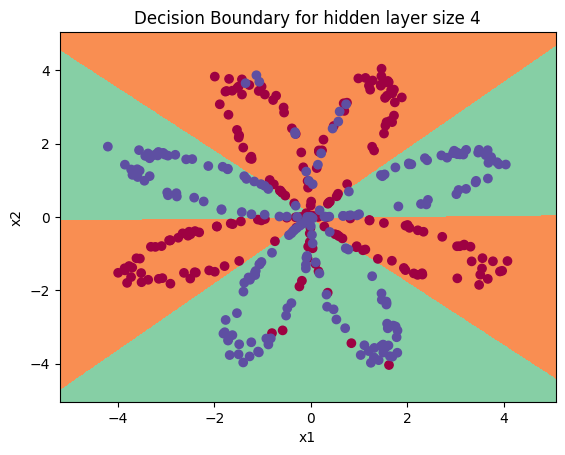

In [22]:
# build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [23]:
# print the accuracy
predictions = predict(parameters, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100))

Accuracy: 90


/tmp/ipykernel_18/1548539719.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100))


/tmp/ipykernel_18/1416583649.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


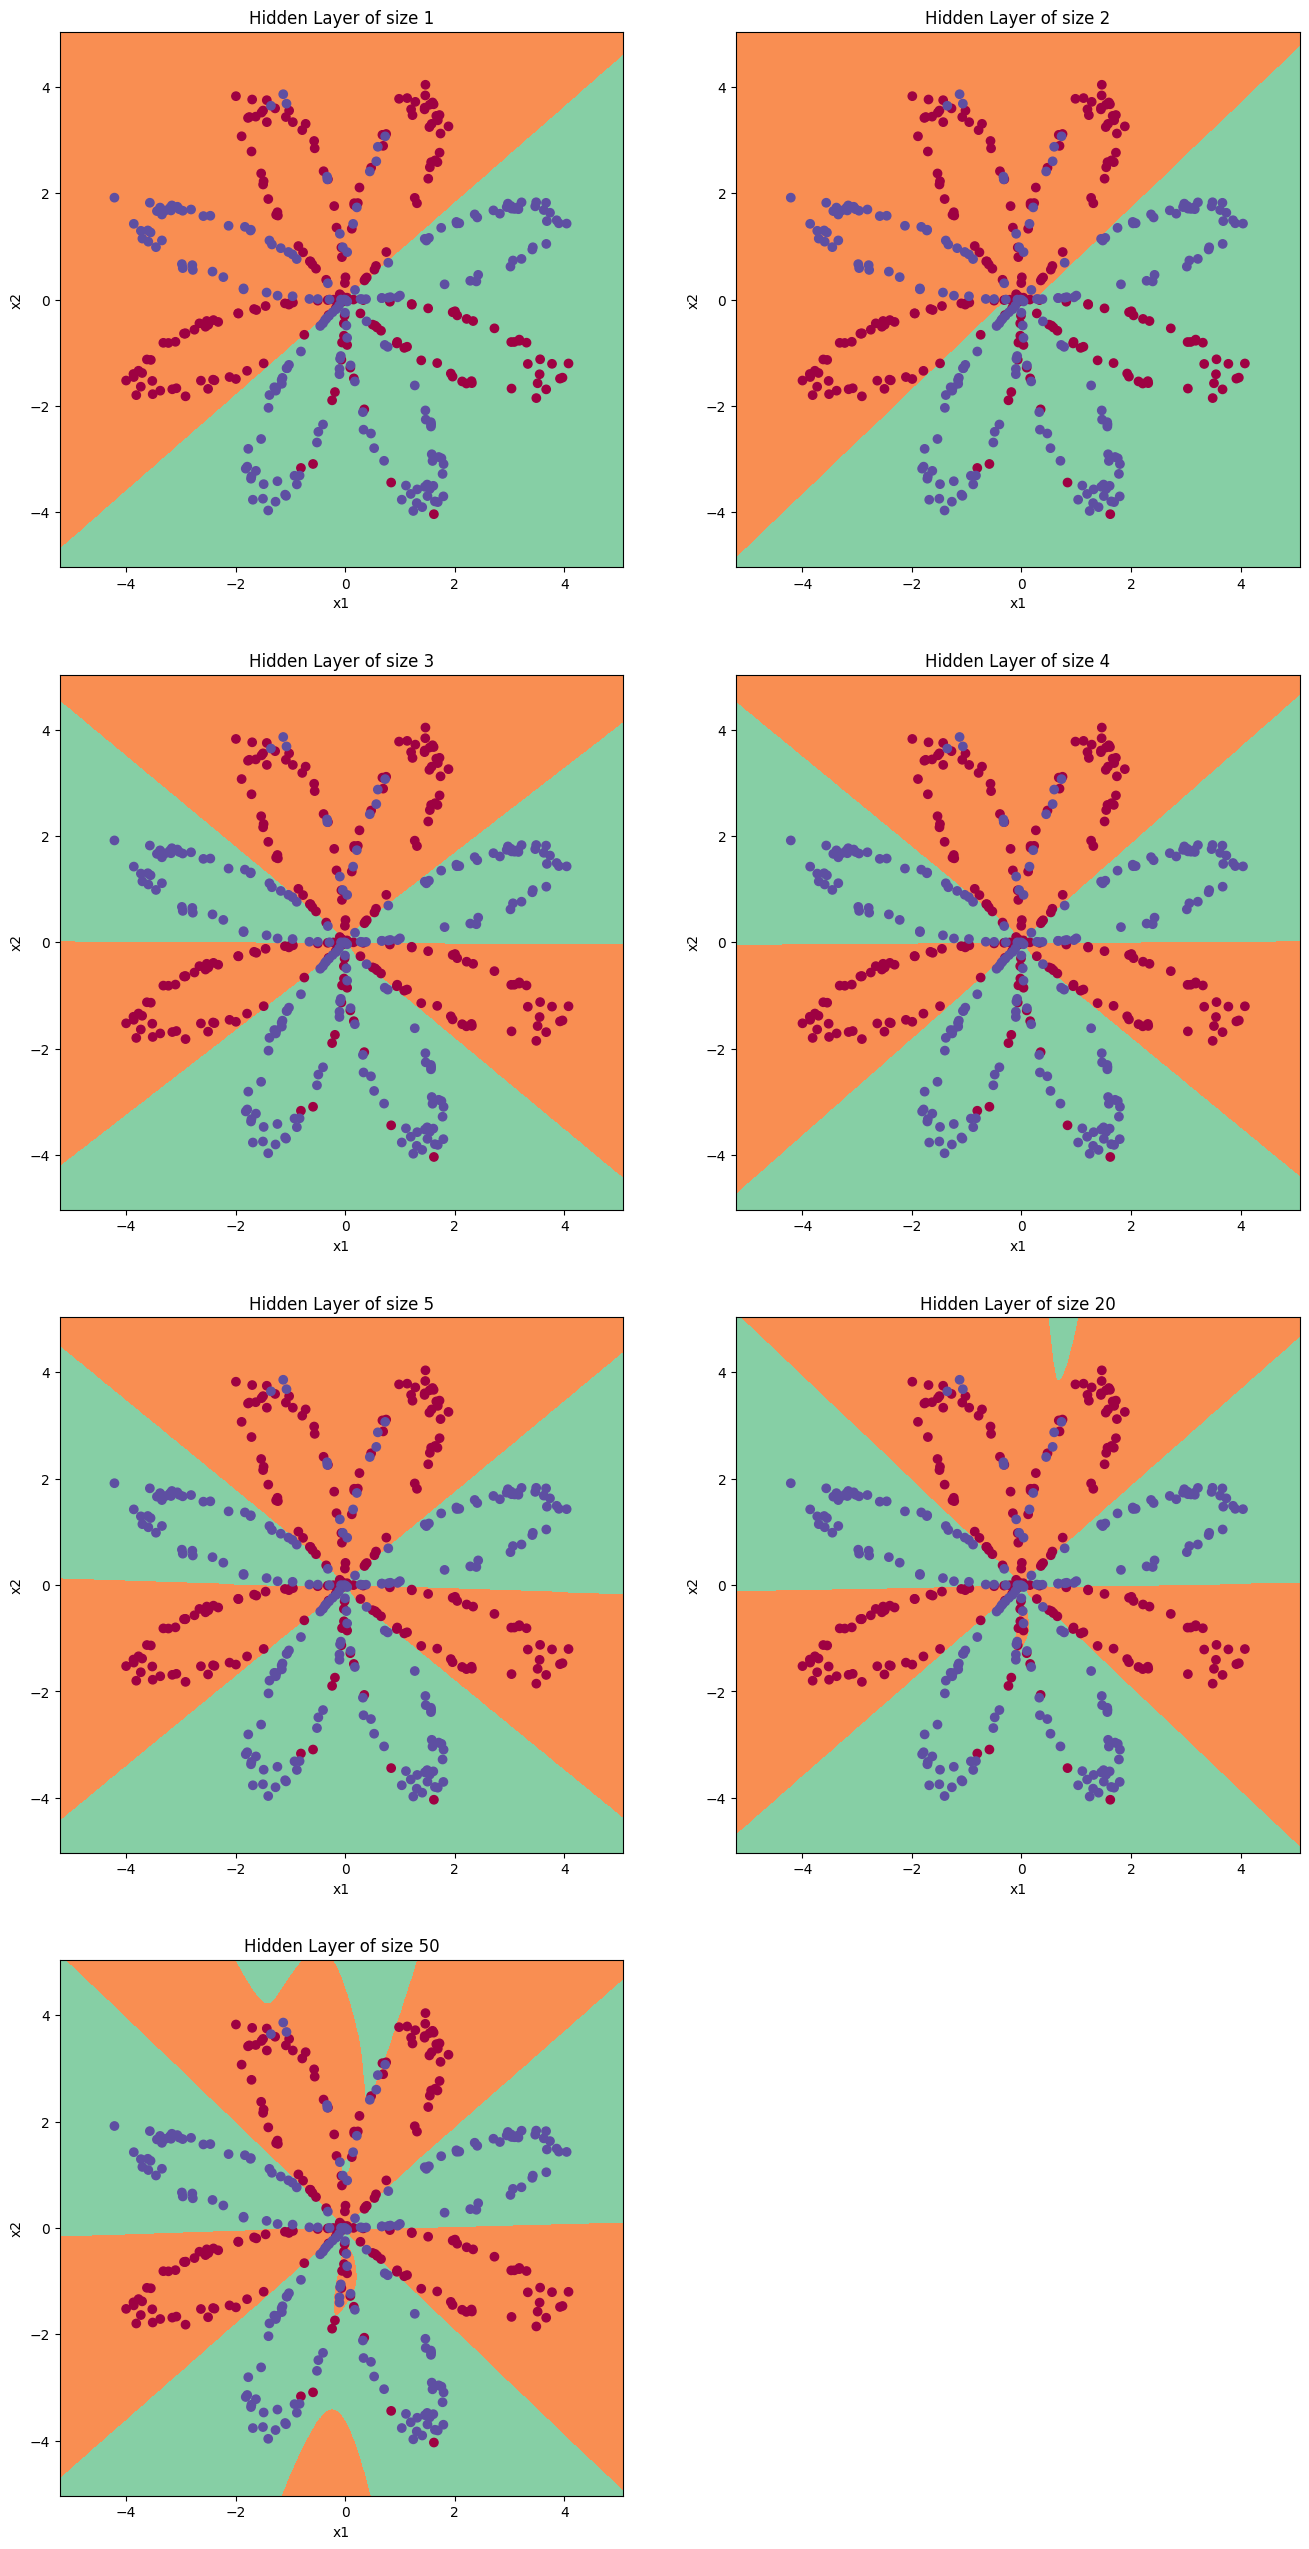

In [24]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(4, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
    print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [25]:
# datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structures = load_extra_datasets()

datasets = {"noisy_circles":noisy_circles,
            "noisy_moons":noisy_moons,
            "blobs":blobs, 
            "gaussian_quantiles":gaussian_quantiles}

In [26]:
def performance_on_other_datasets(dataset):
    X,Y = datasets[dataset]
    X,Y = X.T, Y.reshape(1, Y.shape[0])
    
    if dataset == "blobs":
        Y = Y%2
        
    print("Data from the dataset:" + dataset)
    plt.scatter(X[0,:], X[1,:], c=Y, s=40, cmap=plt.cm.Spectral);
    plt.show()
    
    print("\n ================================ \n")
    print("Predictions")
    
    plt.figure(figsize=(16,32))
    hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

    for i, n_h in enumerate(hidden_layer_sizes):
        plt.subplot(4, 2, i+1)
        plt.title('Hidden Layer of size %d' % n_h)
        parameters = nn_model(X, Y, n_h, num_iterations = 5000)
        plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
        predictions = predict(parameters, X)
        accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)
        print("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    plt.show()

Data from the dataset:noisy_moons


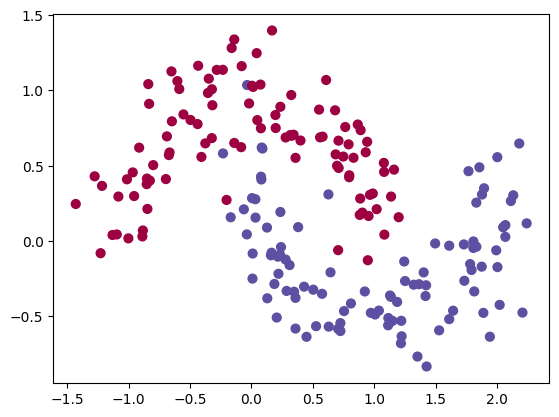



Predictions


/tmp/ipykernel_18/3666812935.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 87.5 %
Accuracy for 2 hidden units: 87.0 %
Accuracy for 3 hidden units: 97.0 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 87.0 %
Accuracy for 20 hidden units: 98.5 %
Accuracy for 50 hidden units: 89.5 %


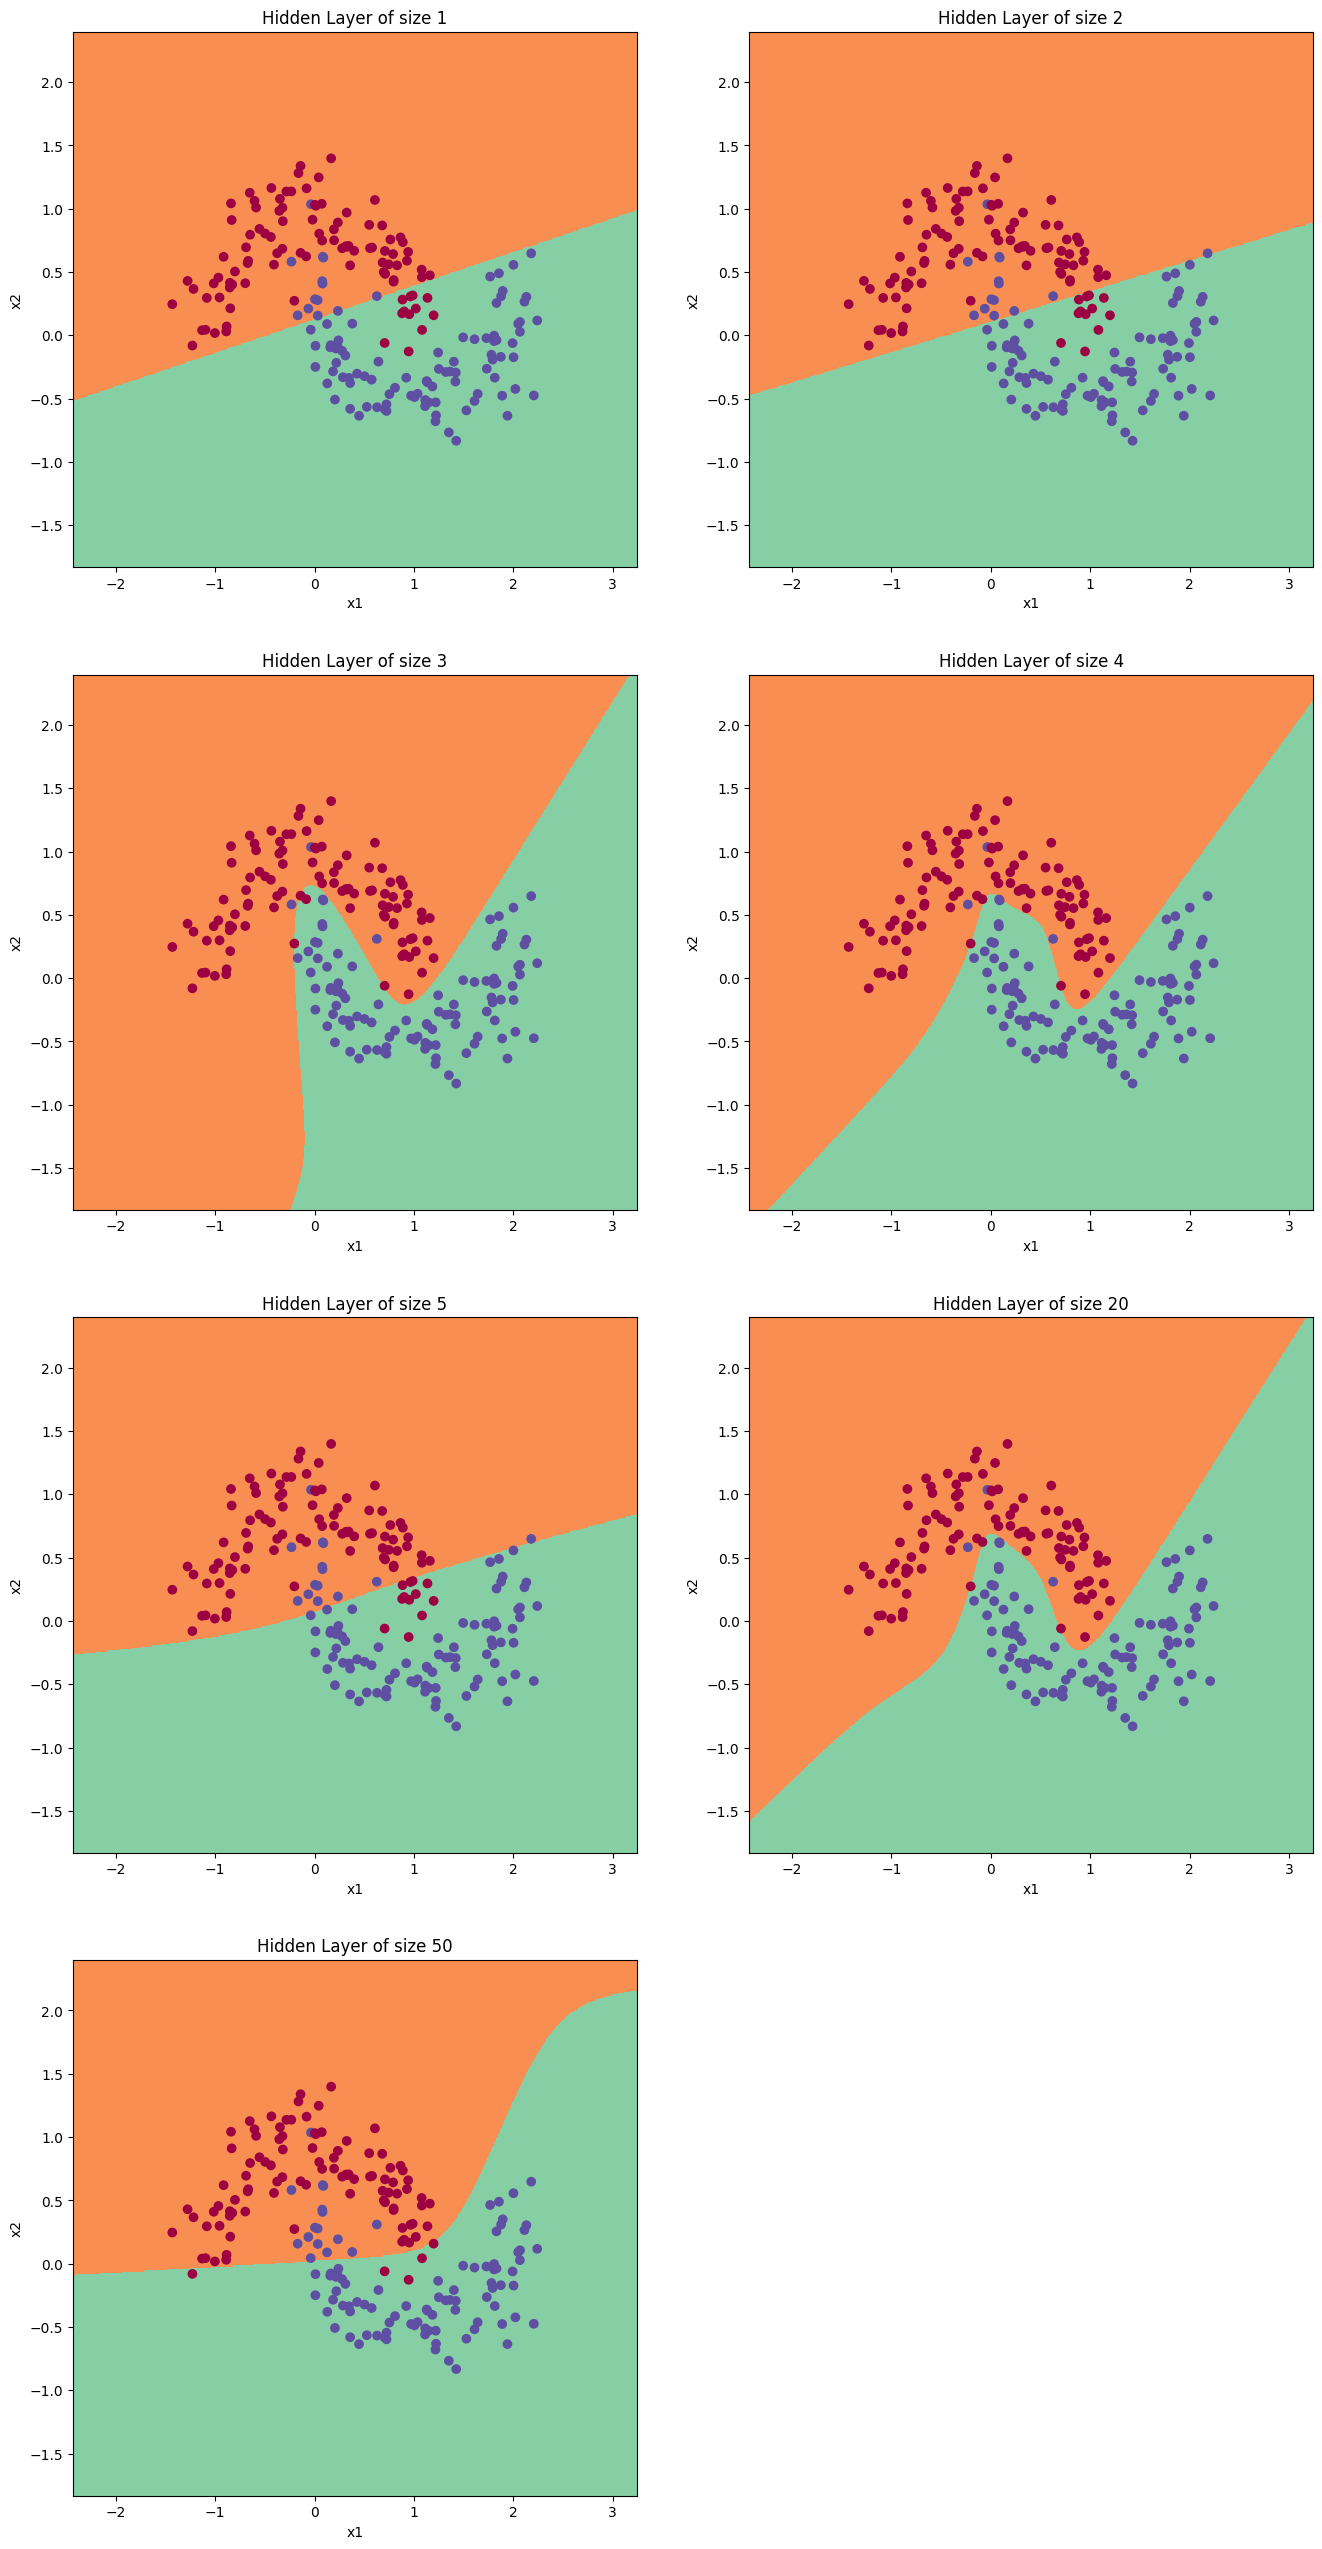

In [27]:
dataset = "noisy_moons"
performance_on_other_datasets(dataset)

Data from the dataset:blobs


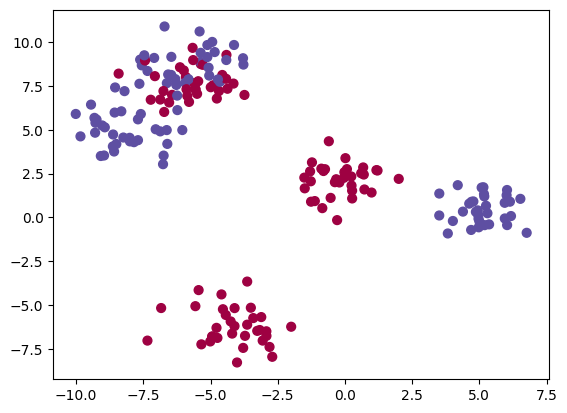



Predictions


/tmp/ipykernel_18/3666812935.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 67.0 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 83.0 %
Accuracy for 4 hidden units: 83.0 %
Accuracy for 5 hidden units: 83.0 %
Accuracy for 20 hidden units: 88.0 %
Accuracy for 50 hidden units: 83.5 %


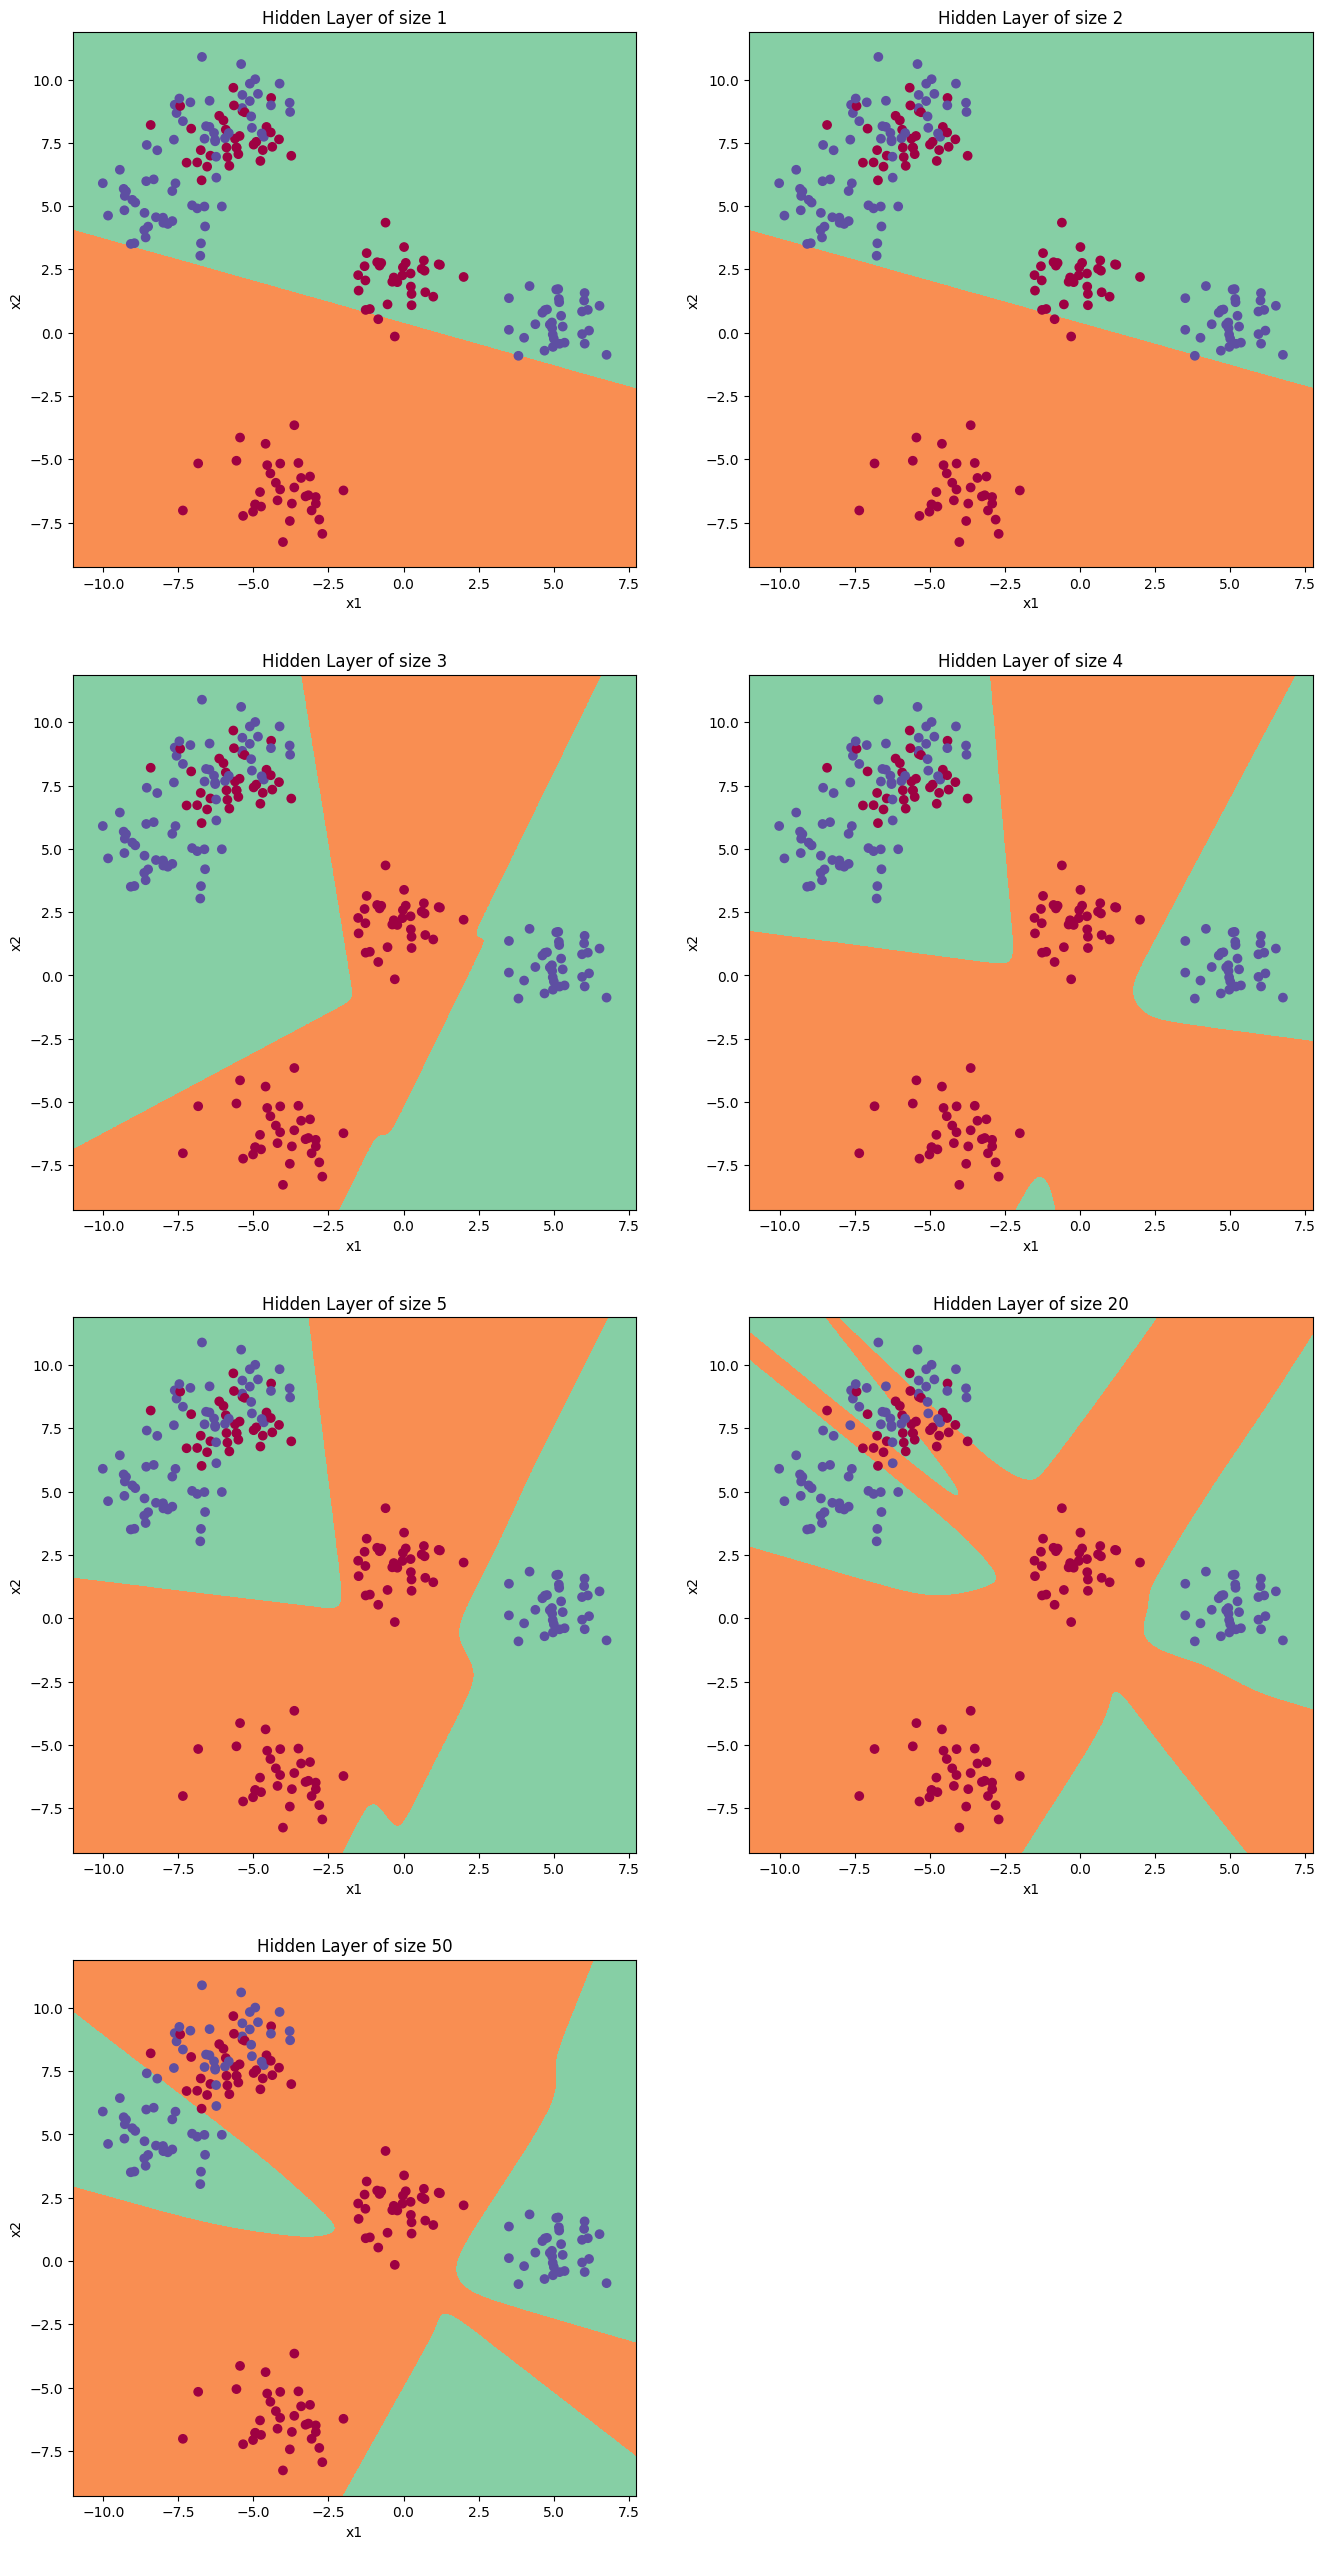

In [28]:
dataset = "blobs"
performance_on_other_datasets(dataset)

Data from the dataset:gaussian_quantiles


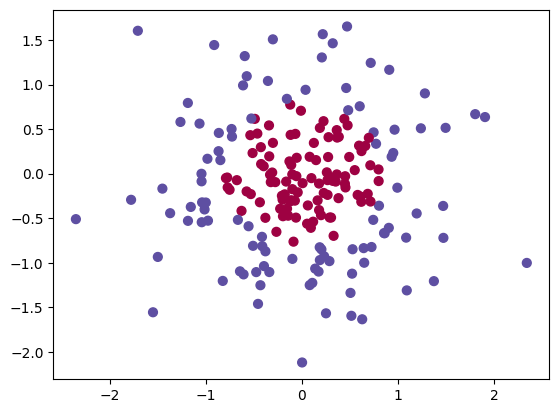



Predictions


/tmp/ipykernel_18/3666812935.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 71.0 %
Accuracy for 2 hidden units: 84.0 %
Accuracy for 3 hidden units: 77.5 %
Accuracy for 4 hidden units: 98.0 %
Accuracy for 5 hidden units: 98.0 %
Accuracy for 20 hidden units: 100.0 %
Accuracy for 50 hidden units: 100.0 %


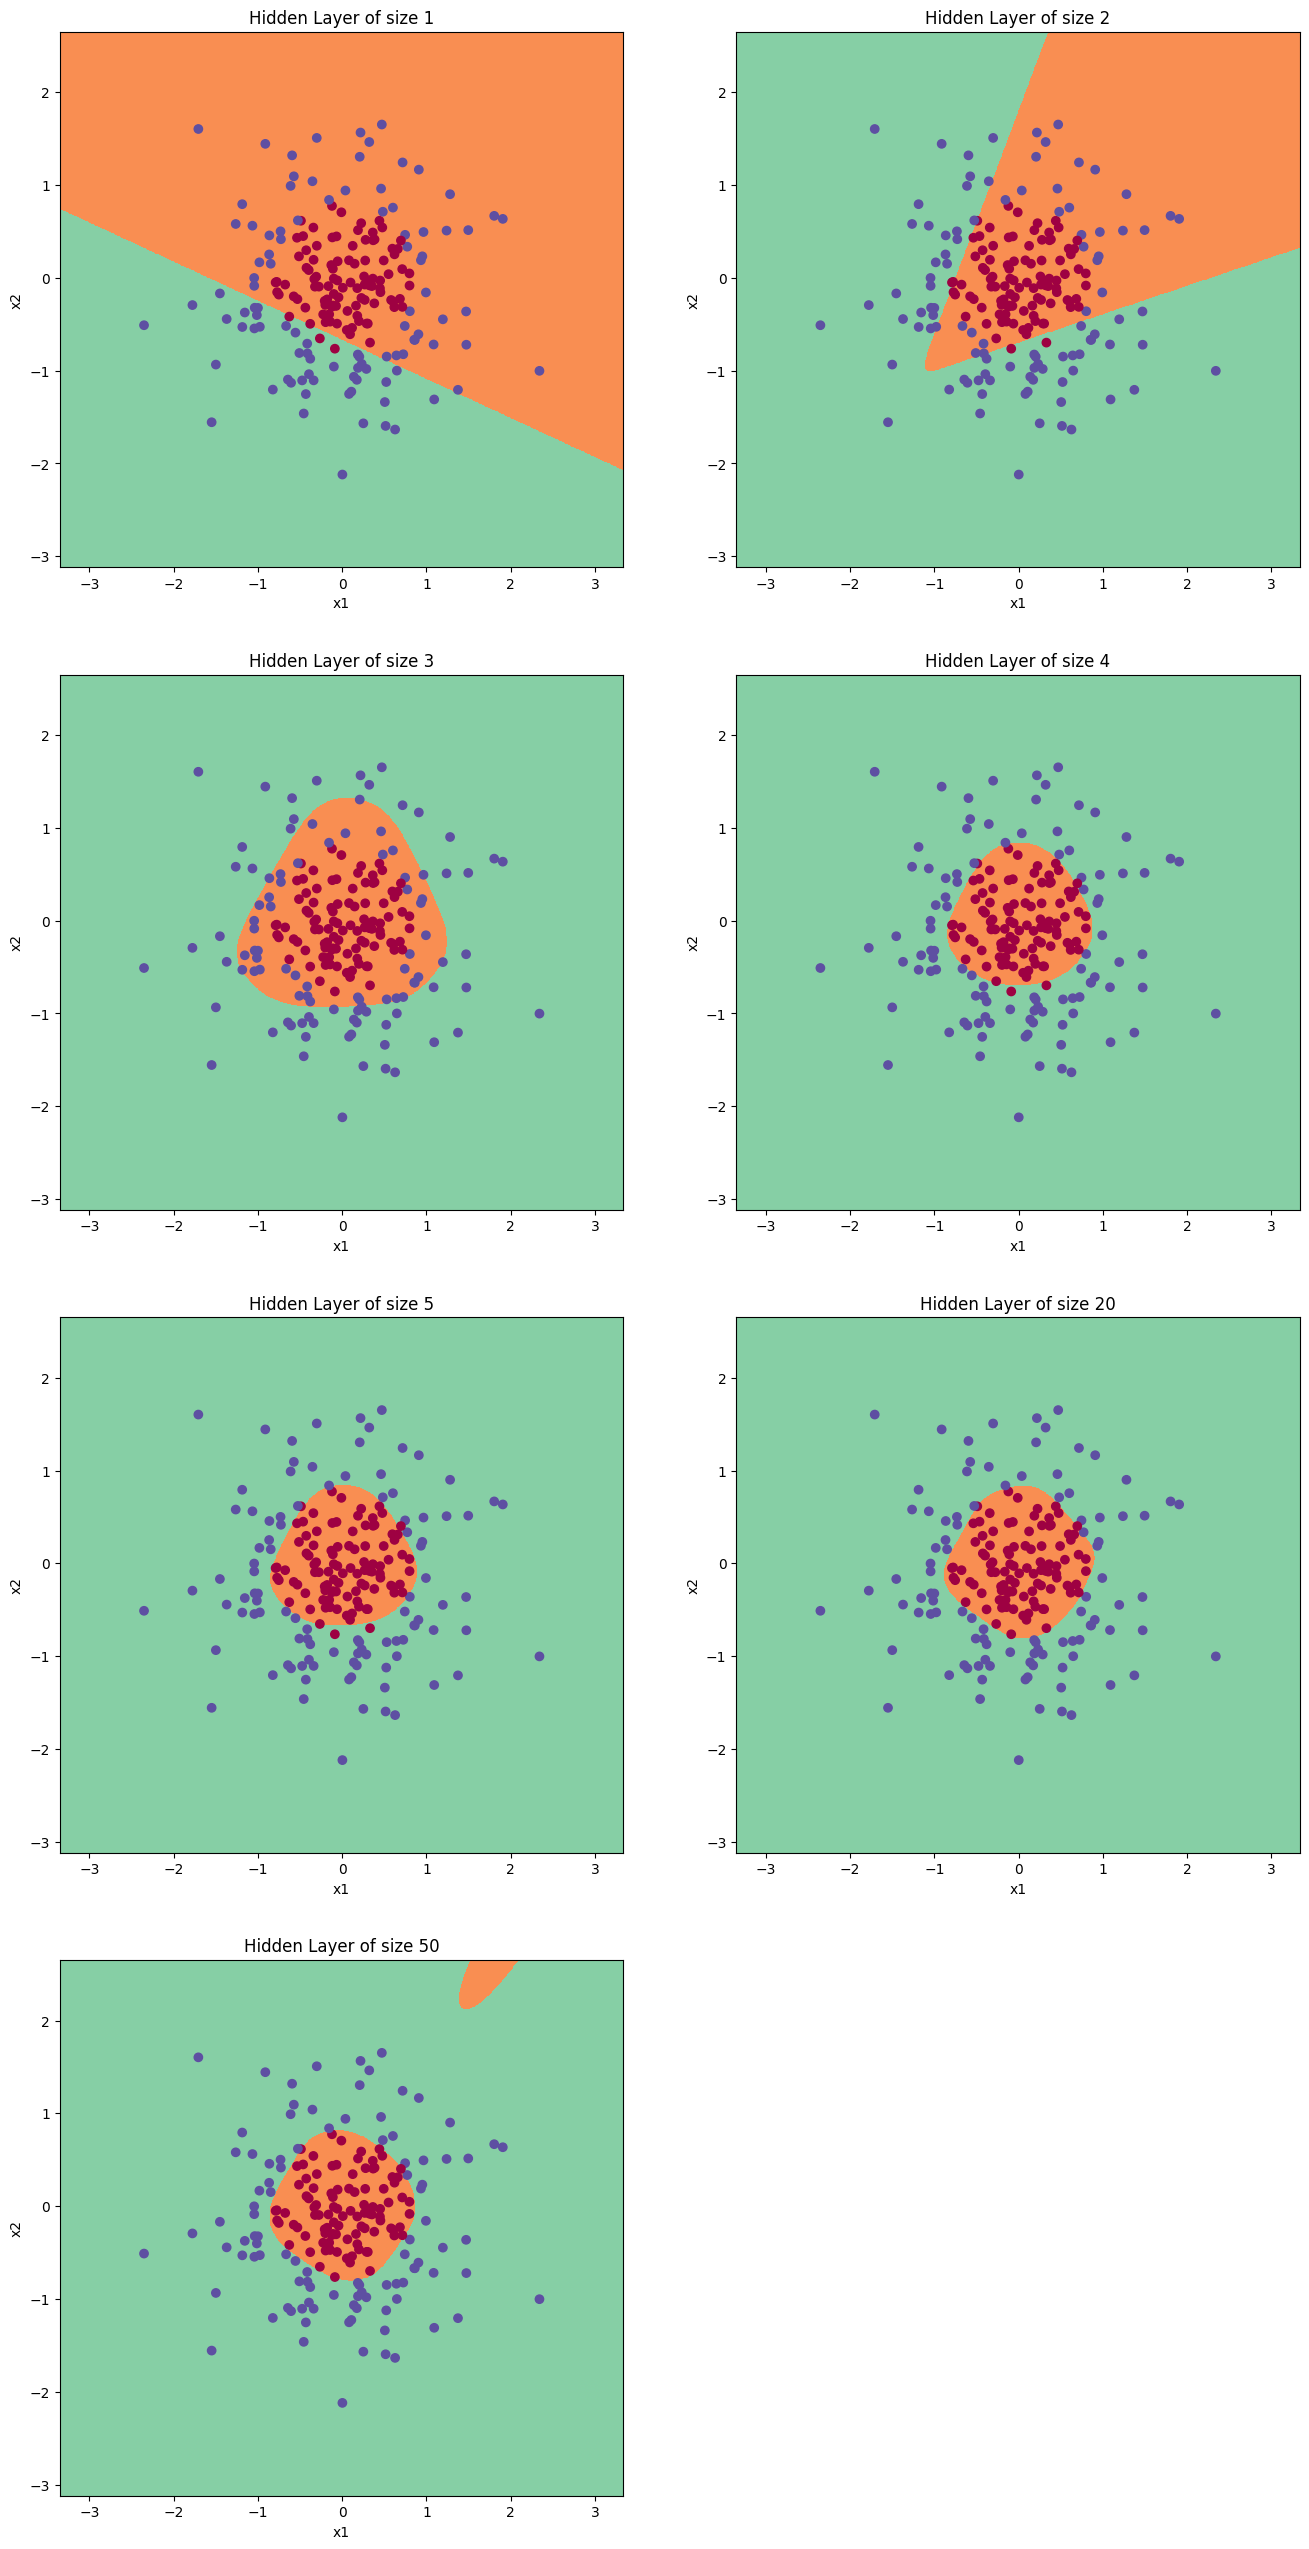

In [29]:
dataset = "gaussian_quantiles"
performance_on_other_datasets(dataset)

Data from the dataset:noisy_circles


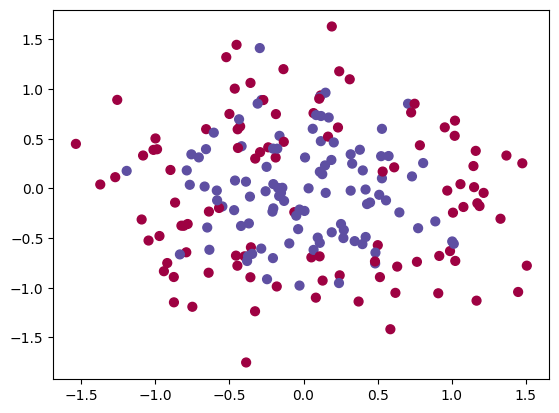



Predictions


/tmp/ipykernel_18/3666812935.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size)*100)


Accuracy for 1 hidden units: 59.5 %
Accuracy for 2 hidden units: 73.0 %
Accuracy for 3 hidden units: 79.0 %
Accuracy for 4 hidden units: 75.5 %
Accuracy for 5 hidden units: 79.0 %
Accuracy for 20 hidden units: 80.5 %
Accuracy for 50 hidden units: 79.0 %


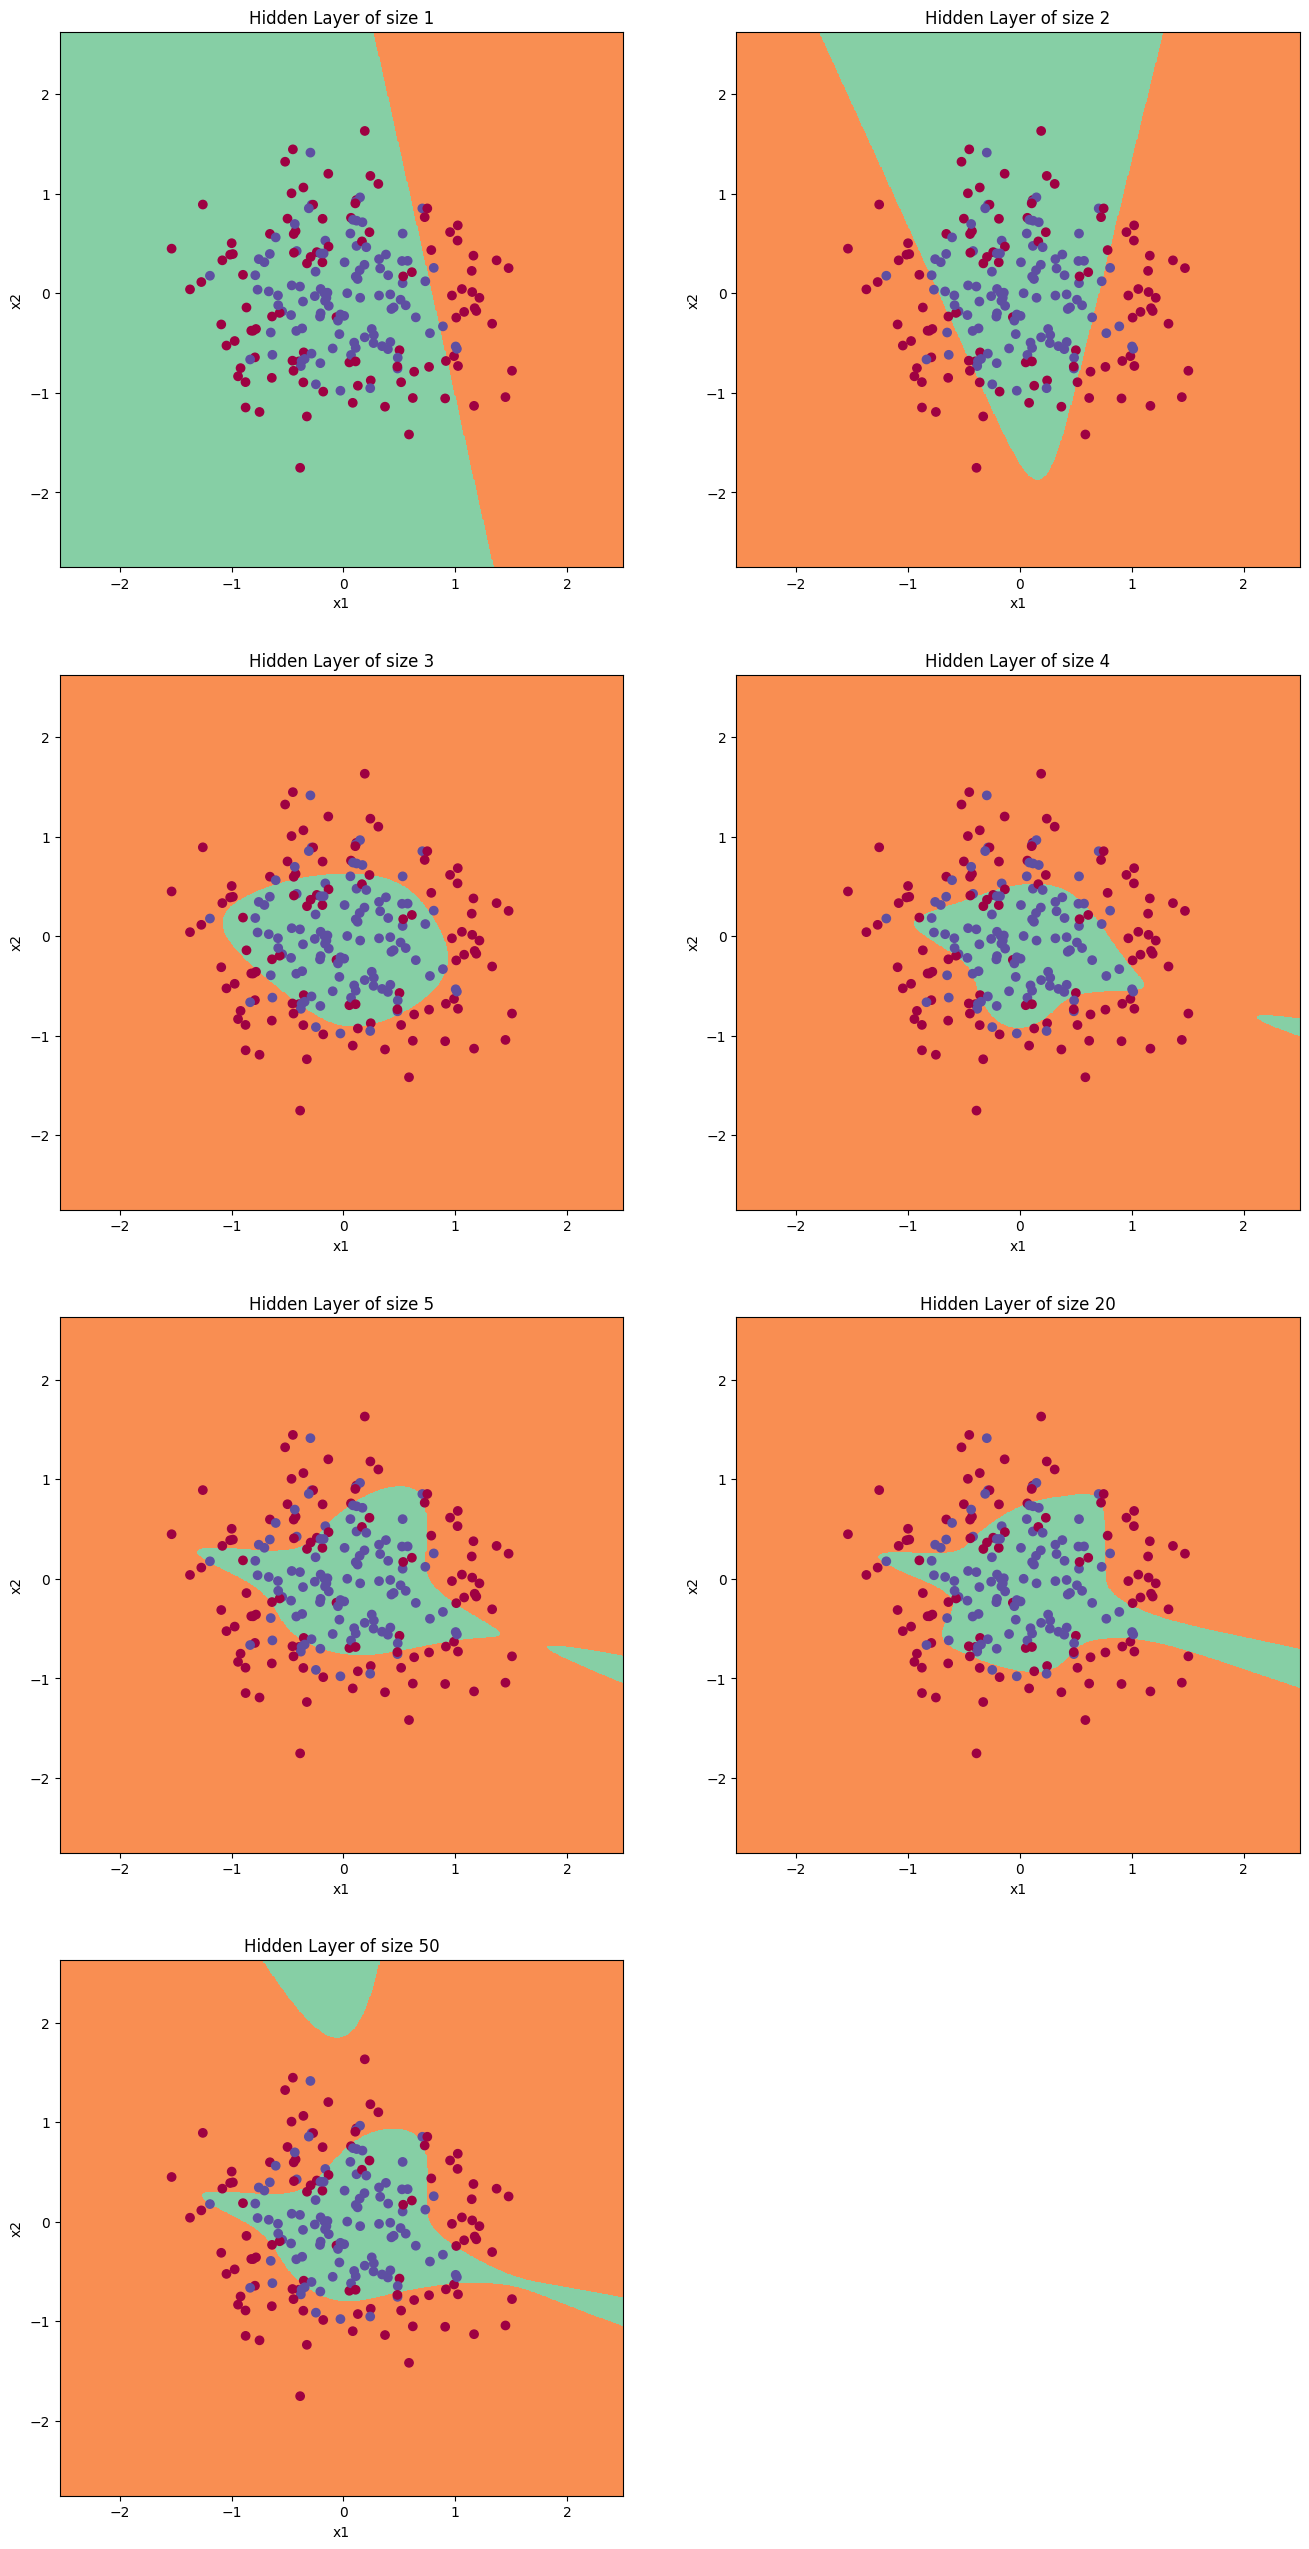

In [30]:
dataset = "noisy_circles"
performance_on_other_datasets(dataset)